In [31]:
import itchat
from itchat.content import *

In [35]:
itchat.auto_login(hotReload=True)

No uins in 51 message

No uins in 51 message

No uins in 51 message

loading login status succeeded.


In [3]:
friends = itchat.get_friends(update=True)
friends[0]

<User: {'UserName': u'@79508d15dacfdd897c9c218f19c19532', 'City': u'\u6df1\u5733', 'DisplayName': '', 'UniFriend': 0, 'OwnerUin': 0, 'MemberList': <ContactList: []>, 'PYQuanPin': u'zhangxiechuan', 'RemarkPYInitial': u'', 'Uin': 74584080, 'AppAccountFlag': 0, 'VerifyFlag': 0, 'Province': u'\u5e7f\u4e1c', 'KeyWord': u'xie', 'RemarkName': u'', 'PYInitial': u'ZXC', 'ChatRoomId': 0, u'IsOwner': 0, 'HideInputBarFlag': 0, u'HeadImgFlag': 1, 'EncryChatRoomId': '', 'AttrStatus': 233573, 'SnsFlag': 49, 'MemberCount': 0, u'WebWxPluginSwitch': 2, 'Alias': '', 'Signature': u'\u4eb2\u624b\u6bc1\u6389\uff01\n\u518d\u4eb2\u624b\u5851\u9020\u51fa\u6765\uff01', 'ContactFlag': 2051, 'NickName': u'\u5f20\u534f\u5ddd', 'RemarkPYQuanPin': u'', 'HeadImgUrl': u'/cgi-bin/mmwebwx-bin/webwxgeticon?seq=678377945&username=@79508d15dacfdd897c9c218f19c19532&skey=@crypt_19846724_edb675c778d8df938816a2e28a37b795', 'Sex': 1, 'StarFriend': 0, 'Statues': 0}>

In [4]:
myself = friends[0]
print myself.NickName

张协川


In [6]:
for k,v in myself.items():
    print k,v

UserName @79508d15dacfdd897c9c218f19c19532
City 深圳
DisplayName 
UniFriend 0
OwnerUin 0
MemberList []
PYQuanPin zhangxiechuan
RemarkPYInitial 
Uin 74584080
AppAccountFlag 0
VerifyFlag 0
Province 广东
KeyWord xie
RemarkName 
PYInitial ZXC
ChatRoomId 0
IsOwner 0
HideInputBarFlag 0
HeadImgFlag 1
EncryChatRoomId 
AttrStatus 233573
SnsFlag 49
MemberCount 0
WebWxPluginSwitch 2
Alias 
Signature 亲手毁掉！
再亲手塑造出来！
ContactFlag 2051
NickName 张协川
RemarkPYQuanPin 
HeadImgUrl /cgi-bin/mmwebwx-bin/webwxgeticon?seq=678377945&username=@79508d15dacfdd897c9c218f19c19532&skey=@crypt_19846724_edb675c778d8df938816a2e28a37b795
Sex 1
StarFriend 0
Statues 0


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
plt.rcParams['font.sans-serif'] = ['SimeHei'] #黑体
plt.rcParams['font.family'] = "SimHei" # 设置默认字体
plt.rcParams['axes.unicode_minus'] = False

In [8]:
data = pd.DataFrame(friends)
data.head()

Alias  AppAccountFlag  AttrStatus  ChatRoomId City  ContactFlag DisplayName  \
0                     0      233573           0   深圳         2051               
1                     0       98339           0                 1               
2                     0       98493           0   汕头            3               
3                     0        4197           0   房山            3               
4                     0       12389           0   梅州            3               

  EncryChatRoomId  HeadImgFlag  \
0                          1.0   
1                          NaN   
2                          NaN   
3                          NaN   
4                          NaN   

                                          HeadImgUrl        ...         Sex  \
0  /cgi-bin/mmwebwx-bin/webwxgeticon?seq=67837794...        ...           1   
1  /cgi-bin/mmwebwx-bin/webwxgeticon?seq=62093000...        ...           1   
2  /cgi-bin/mmwebwx-bin/webwxgeticon?seq=62321281...        ...           1   
3  /cgi-bin/mmwebwx-bin/webwxgeticon?seq=62487141...        ...           1   
4  /cgi-bin/mmwebwx-bin/webwxgeticon?seq=62529429...        ...           2   

          Signature SnsFlag  StarFriend Statues       Uin  UniFriend  \
0   亲手毁掉！\n再亲手塑造出来！      49           0       0  74584080          0   
1                        48           0       0         0          0   
2                 ，      49           0       0         0          0   
3   路漫漫其修远兮，吾将上下而求索      17           0       0         0          0   
4  冲破心灵的束缚，迎接美好的未来！       1           0       0         0          0   

                                            UserName VerifyFlag  \
0                  @79508d15dacfdd897c9c218f19c19532          0   
1  @561f452de9ff1bf8d5d42496c0d14190ef54fb456066f...          0   
2                  @b4f42dc3d0a7346f0c40ed19528e9fc6          0   
3  @468f364934f0feac201b46d67c1b22584ad43b4764536...          0   
4  @4bf950bd58a23042ef6a52f5071439a957b132cd8f413...          0   

  WebWxPluginSwitch  
0               2.0  
1               NaN  
2               NaN  
3               NaN  
4               NaN  

[5 rows x 33 columns]

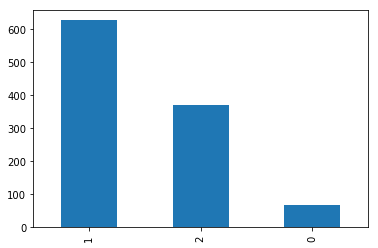

In [15]:
data.Sex.value_counts().plot(kind='bar')

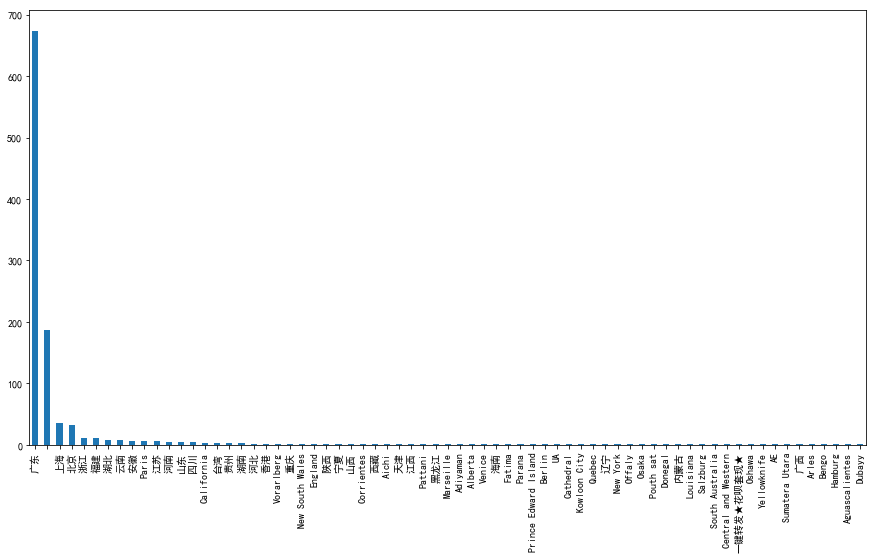

In [25]:
data.Province.value_counts().plot(kind='bar',figsize=(15,8))

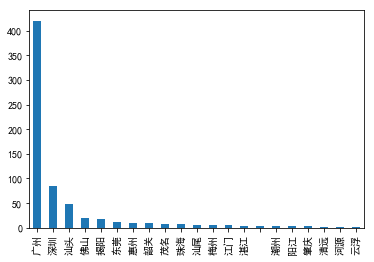

In [24]:
data[data.Province == u'广东'].City.value_counts().plot(kind='bar')

In [26]:
data.StarFriend.value_counts()

0    1067
Name: StarFriend, dtype: int64

In [28]:
data.to_excel('../data/friends.xls', encoding='gbk')

In [29]:
def display(msg):
    for k,v in msg.items():
        print k,': ', v

In [32]:
# 注册消息响应事件
@itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING])
def text_reply(msg):
    print 'msg'
    display(msg)


@itchat.msg_register(TEXT, isGroupChat=True)
def text_reply_group(msg):
    print 'group msg'
    display(msg)
    
itchat.run(True)

Start auto replying.


group msg
ActualNickName :  章航
ImgWidth :  0
FromUserName :  @@37e35739e70e9bb75a271c035a7c06963f457f0a76ecae9df3bb54787438159c
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  广东安捷物联招人啦！！招聘职位：空调工程师
工作地点就在广州。谁说理工男很呆？谁说学习机械的没有帅哥？谁说学技术就得埋头苦干？都不是！只要你来，一个崭新的平台，一个全新的市场，完善你的职业规划。待遇从优，不限应往届。
岗位职责：
1.协助市场人员做好技术支持； 
2.制作空调系统改造与节能技术改造的技术方案； 
3.负责空调制冷采暖技术改造的现场技术支持工作等。
职位要求：
1.本科以上学历，暖通、空调、制冷等相关专业； 
2.熟悉空调机房冷水机组、冷却塔、新风机组等暖通空调设备的运行； 
3.精通空调系统方案图纸和施工图纸；
4、工作认真负责，具有较好的沟通协调能力。
 联系方式：18102662371 （甘小姐）
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  3625348557399066845
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@37e35739e70e9bb75a271c035a7c06963f457f0a76ecae9df3bb54787438159c'

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


group msg
ActualNickName :  DT君
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  进群有一点点小规则哈：
（1）进群后自觉修改群名片：领域/职业/专业+昵称+爱好/自我定位,定期清理不修改名片者；
（2）积极参与话题讨论，有理有数据，与DT君一起共建和谐活跃的社群；
（3）想看哪方面的数据分析或是想参加什么样的数据活动，有好主意欢迎撩骚DT君；
（4）拒绝奇♂怪的小广告，发问卷、招聘贴等内容前请先私信DT君。违者立删！
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  6135637432897791120
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPY

No uins in 51 message

No uins in 51 message



group msg
ActualNickName :  学生-Richard-深圳
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  奇。怪
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  1343052040822545095
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u'', u'

group msg
ActualNickName :  刘灼盛 - 深圳 - 知学云
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  还有一条：只有大头君可以拉人进来
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  6160252663372581735
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQua

group msg
ActualNickName :  大宝儿
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  get
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  3605803556635915992
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u'', u'RemarkPYIn

No uins in 51 message

No uins in 51 message



group msg
ActualNickName :  学生-Richard-深圳
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  后援团是什么意思啊
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  3794303880324335162
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u

group msg
ActualNickName :  DT君
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  大头君?
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  8565203447243775379
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u'', u'RemarkPYI

group msg
ActualNickName :  刘灼盛 - 深圳 - 知学云
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  补一条：本群奉公守法，不造谣，不破坏社会和谐。若出现违法情况，均为群主指使。
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  6055387403968448642
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'Mem

group msg
ActualNickName :  刘灼盛 - 深圳 - 知学云
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  大头君就是你
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  3407214910289837052
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u''

group msg
ActualNickName :  白草-上海-摸鱼
ImgWidth :  0
FromUserName :  @@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  参考Inception
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  5455853861949414569
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'\u5f20\u534f\u5ddd-\u6df1\u5733-\u6570\u636e', u'KeyWord': u'xie', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactLi

group msg
ActualNickName :  学生-Richard-深圳
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  最近这段时间还是少说点敏感词
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  8860112625077356154
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPi

No uins in 51 message

No uins in 51 message

Dump login status for hot reload successfully.
itchat received an ^C and exit.
Bye~


In [36]:
@itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING])
def text_reply(msg):
    print 'msg'
    display(msg)

In [37]:
itchat.run(True)

Start auto replying.


group msg
ActualNickName :  劉宫羽
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  后援团是什么意思啊[呲牙]
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  71846247419584781
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u'', u'Re

ActualNickName :  DT君
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  请先按照格式修改群名片、
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  474603196418003630
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u'', u'RemarkPYInit

group msg
ActualNickName :  心晴-上海-学生
ImgWidth :  0
FromUserName :  @@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  看跟谁打交道
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  1583185298778080970
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'\u5f20\u534f\u5ddd-\u6df1\u5733-\u6570\u636e', u'KeyWord': u'xie', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: [

group msg
ActualNickName :  second-深圳-java
ImgWidth :  0
FromUserName :  @@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  @小鱼-上海-心理 竟然是出国大神，想当初我也学了四年心理学。。。
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  2223898444090464627
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'\u5f20\u534f\u5ddd-\u6df1\u5733-\u6570\u636e', u'KeyWord': u'xie', u'PYInitial': u'', u'Uin':

group msg
ActualNickName :  心晴-上海-学生
ImgWidth :  0
FromUserName :  @@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  [可怜][可怜]
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  3877809278508617089
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'\u5f20\u534f\u5ddd-\u6df1\u5733-\u6570\u636e', u'KeyWord': u'xie', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList:

msg
AppInfo :  {u'Type': 0, u'AppID': u''}
ImgWidth :  0
FromUserName :  @bcf2cf0858ae95a1bdeab92e468f7b20
PlayLength :  0
OriContent :  
ImgStatus :  1
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  它现在改一点了
MsgType :  1
StatusNotifyUserName :  
ImgHeight :  0
StatusNotifyCode :  0
Type :  Text
NewMsgId :  566573924914560245
Status :  3
VoiceLength :  0
MediaId :  
MsgId :  566573924914560245
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
FileName :  
Url :  
HasProductId :  0
User :  {u'UserName': u'@bcf2cf0858ae95a1bdeab92e468f7b20', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'MemberList': <ContactList: []>, u'PYQuanPin': u'Mandy?', u'RemarkPYInitial': u'BBYBB', u'Uin': 0, u'AppAccountFlag': 0, u'VerifyFlag': 0, u'Province': u'', u'KeyWord': u'qq1', u'Remar

No uins in 51 message



group msg
ActualNickName :  DT君
ImgWidth :  0
FromUserName :  @@d5c9597e8f007ef46cf1e05418cdeb833e567d0d72be5bf61c2ecf699fbf7cc8
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  [爱心] 感谢各位小伙伴对DT君的喜爱，很开心能得到各位的支持~[爱心] 
 
我们有一些小规则希望您能遵守：
（1）进群后自觉修改群名片：领域/职业/专业+昵称+爱好/自我定位，我们会定期清理长期潜水且未修改名片者；
（2）积极参与话题讨论，有理有数据，与DT君一起共建和谐活跃的社群；
（3）想看哪方面的数据分析或是想参加什么样的数据活动，有好主意欢迎撩骚DT君；
（4）拒绝奇♂怪的小广告，发问卷、招聘贴等内容前请先私信DT君。违者立删。  

谢谢~[玫瑰]
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  503826796315168322
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@d5c9597e8f007ef46cf1e05418cdeb833e567d0d72be5bf61c2ecf699fbf7cc8', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: 

group msg
ActualNickName :  DT君
ImgWidth :  0
FromUserName :  @@d5c9597e8f007ef46cf1e05418cdeb833e567d0d72be5bf61c2ecf699fbf7cc8
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  请按照群公告修改群名片哦
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  1657490568752685410
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@d5c9597e8f007ef46cf1e05418cdeb833e567d0d72be5bf61c2ecf699fbf7cc8', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'\u5168\u6808\u6570\u636e-\u5f20\u534f\u5ddd-\u5e7f\u5dde', u'KeyWord': u'xie', u'PYInitial': u'', u'Uin': 0, 'MemberList': <C

group msg
ActualNickName :  小鱼-上海-心理
ImgWidth :  0
FromUserName :  @@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  @second-深圳-java 我也是，而且我还坑爹地去读了研。。。我很喜欢心理咨询，但是国内市场太乱了
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  1235523746772790681
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@7bc2e4eaf6217fd8eae3cf771c458473cf79e83ec5e9d416a1e12375086f4b98', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'\u5f20\u534f\u5ddd-\u6df1\u5733-\u6570\u636e', u'KeyWord': u'xie', u'PYInitial':

group msg
ActualNickName :  数据产品-刘灼盛-爱好怼大头君
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  改好了
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  6388070284360815962
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u'', 

group msg
ActualNickName :  数据产品-刘灼盛-爱好怼大头君
ImgWidth :  0
FromUserName :  @@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75
PlayLength :  0
OriContent :  
RecommendInfo :  {u'UserName': u'', u'Province': u'', u'City': u'', u'Scene': 0, u'QQNum': 0, u'Content': u'', u'Alias': u'', u'OpCode': 0, u'Signature': u'', u'Ticket': u'', u'Sex': 0, u'NickName': u'', u'AttrStatus': 0, u'VerifyFlag': 0}
Content :  对不对
StatusNotifyUserName :  
StatusNotifyCode :  0
Type :  Text
NewMsgId :  7956283593048353527
Status :  3
VoiceLength :  0
ToUserName :  @79508d15dacfdd897c9c218f19c19532
ForwardFlag :  0
User :  {u'UserName': u'@@9d832515f184f7ddf9f74be4dc66ed8635c46f3fdac5cb6cb4bf481a0c6edf75', u'City': u'', u'DisplayName': u'', u'UniFriend': 0, 'Self': <ChatroomMember: {u'UserName': u'@79508d15dacfdd897c9c218f19c19532', u'RemarkPYQuanPin': u'', u'DisplayName': u'', u'KeyWord': u'', u'PYInitial': u'', u'Uin': 0, 'MemberList': <ContactList: []>, u'MemberStatus': 0, u'PYQuanPin': u'', 

Unexpected sync check result: window.synccheck={retcode:"1101",selector:"0"}
LOG OUT!
